# Matplotlib - The Power of Plots

## Findings

#### 1. There is almost a near positive correlation between the mouse's weight and the tumor volume.  In fact with a correlation coefficient at 0.95, it is almost certain that these two are positively correlated.

#### 2.  On mouse ID s185, there was a significant decrease in the tumor volume over the time period.  The tumor volume on this mouse went from 45 cubic millimeters to less than 25 cubic millimeters, showing real promise for this drug.

#### 3.  With the exception of 1 mouse on Infubinol, all four reigmens showed consistent results regarding the tumor volume of the mice at the end.  Looking at the box and whisker plot, Capomulin and Ramicane seemed to be the most promising of results with the tumor volumes taken at maximum time point having a median of less than 40 cubic millimeters.  Infubinol and Ceftamin still had median tumor volumes closer to 60 cubic millimeters.

## Setting up data for analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np  

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#Create a combined DataFrame
combined_data = pd.merge(mouse_metadata,study_results,how="outer", on="Mouse ID")

In [5]:
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics table for each drug regimen

  - Mean
  - Median
  - Variance
  - Standard Deviation
  - SEM of the tumor volume

In [6]:
drug_regiment_group = combined_data.groupby("Drug Regimen")

avg_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].mean()
median_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].median()
var_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].var()  
std_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].std()
sem_tumor_volume = drug_regiment_group['Tumor Volume (mm3)'].sem()


drug_stats_sum = pd.DataFrame({"Mean Tumor Volume": avg_tumor_volume,
                               "Median Tumor Volume": median_tumor_volume,
                               "Tumor Volume Variance": var_tumor_volume,
                               "Tumor Volume Std Deviation": std_tumor_volume,
                               "Tumor Vollume SEM" : sem_tumor_volume
                               }
)

In [7]:
drug_stats_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Deviation,Tumor Vollume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

 - Looking at the number of data points for each drug regimen across Pandas and Matplotlib


(-0.75, 9.75)

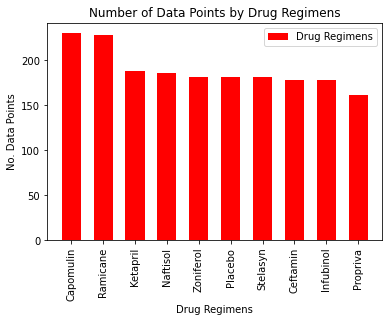

In [8]:
count_drug_regimen = combined_data['Drug Regimen'].value_counts()
reset_count_drug_regimen = count_drug_regimen.reset_index()
x_axis = np.arange(len(count_drug_regimen))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,count_drug_regimen, color = "r", align = "center", width = 0.6, label = "Drug Regimens")
plt.legend(loc="best")
plt.xticks(tick_locations, reset_count_drug_regimen["index"], rotation = "vertical")
plt.xlabel("Drug Regimens")
plt.ylabel("No. Data Points")
plt.title("Number of Data Points by Drug Regimens")
plt.xlim(-0.75, len(x_axis)-0.25)


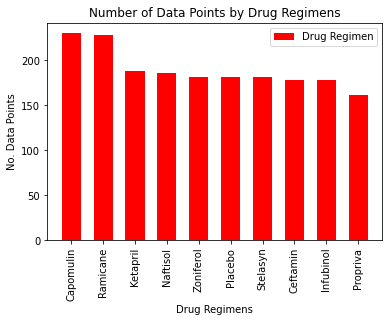

In [9]:
ax = count_drug_regimen.plot(kind="bar",color = "r", width=0.6)
ax.set(xlabel = "Drug Regimens", ylabel = "No. Data Points", title="Number of Data Points by Drug Regimens", label="Drug Regimens")
ax.set_xlim(plt.xlim(-0.75, len(x_axis)-0.25))
ax.legend(loc="best")

## Pie Plots

 - Looking at the distribution of Mice by Gender in Study

Text(0.5, 1.0, 'Distribution of Mice by Gender in Study')

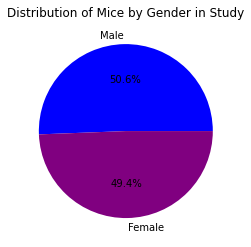

In [10]:
count_mice = combined_data['Sex'].value_counts()
reset_count_mice = count_mice.reset_index()
colors = ["blue", "purple"]
plt.pie(count_mice, labels = reset_count_mice['index'],autopct="%1.1f%%", colors=colors)
plt.title("Distribution of Mice by Gender in Study")


Text(0, 0.5, '')

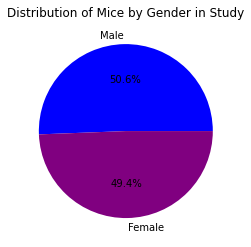

In [11]:
ax = count_mice.plot(kind="pie", colors = colors, autopct="%1.1f%%", labels = reset_count_mice["index"], title = "Distribution of Mice by Gender in Study")
ax.set_ylabel("")

## Box and Whisker PLot

 -  Capturing latest timepoint for each mouse.
 - Identifying Upper/Lower bounds of mice
 - Identifying outlier mice.

In [12]:
#Capturing the latest timepoint for each mouse on the 4 promising regimens
regimen_index= combined_data.set_index("Drug Regimen")
promising_regimens = regimen_index.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
reset_promising_regimens = promising_regimens.reset_index()

mouse = combined_data.groupby("Mouse ID").max()
mousetime = mouse['Timepoint']
reset_mousetime = mousetime.reset_index()

promising_reg_mousetime = pd.merge(reset_promising_regimens,reset_mousetime,how = "inner", on = ["Mouse ID","Timepoint"])

In [13]:
#Identifying the Upper and Lower Bounds of mice on the four promising regimens
Tumor_append =[]
outlier_mice ={}

promising_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for drug in promising_drugs:

    promising_drug = promising_reg_mousetime[promising_reg_mousetime["Drug Regimen"] == drug]

    promising_drug = promising_drug[['Drug Regimen' , 'Tumor Volume (mm3)', "Mouse ID"]]

    drug_index = promising_drug.set_index('Drug Regimen')

    Tumor_append.append(drug_index['Tumor Volume (mm3)'])

    quartiles = drug_index.quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]

    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

    promising_drug["Tumor Volume (mm3)"] = promising_drug["Tumor Volume (mm3)"].astype(float)

    upperBound_mouse = promising_drug[promising_drug["Tumor Volume (mm3)"] > upper_bound["Tumor Volume (mm3)"]]
    lowerBound_mouse = promising_drug[promising_drug['Tumor Volume (mm3)'] < lower_bound["Tumor Volume (mm3)"]] 

    outlier_mice[drug]=[]
    if len(lowerBound_mouse) != 0:
        outlier_mice[drug].append(lowerBound_mouse["Mouse ID"].tolist()  )
    if len(upperBound_mouse) != 0:
        outlier_mice[drug].append(upperBound_mouse["Mouse ID"].tolist()  )
        
print("The following are the mice by drug regimen that are outliers:")
outlier_mice

The following are the mice by drug regimen that are outliers:


{'Capomulin': [], 'Ramicane': [], 'Infubinol': [['c326']], 'Ceftamin': []}

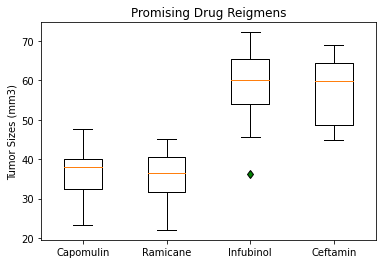

In [14]:


#Displaying the information in a box and whisker plot format.
#Only one mouse is an outlier - 
green_diamond = dict(markerfacecolor='g', marker='d')
fig1, ax1 = plt.subplots()
ax1.set_title('Promising Drug Reigmens')
ax1.set_ylabel('Tumor Sizes (mm3)')
ax1.boxplot(Tumor_append, flierprops=green_diamond)
x_axis = np.arange(len(promising_drugs))
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations, promising_drugs)
plt.show()

## Line Plot

 - Average tumor volume vs time for the  Capomulin mice

In [15]:
#Choosing 1 mouse to look at tumor volume by timepoint.  MouseID s185 was chosen.
regimen_index= combined_data.set_index("Drug Regimen")
Capomulin = regimen_index.loc[['Capomulin']]
reset_Capomulin = Capomulin.reset_index()
Capomulin_mice_index = reset_Capomulin.set_index("Mouse ID")
s185 = Capomulin_mice_index.loc[['s185']]


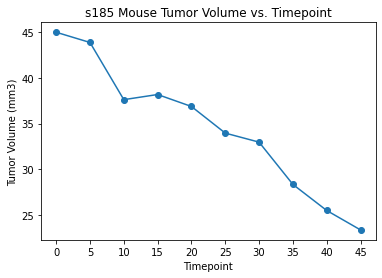

In [16]:
#looking at the Tumor Volume for one mouse s185 by timepoint vs Tumor volume.
x_axis = np.arange(len(s185["Timepoint"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, s185["Timepoint"])
plt.title('s185 Mouse Tumor Volume vs. Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.plot(x_axis, s185["Tumor Volume (mm3)"], marker = "o")


## Scatter plot

 - Looking at mouse weight vs average tumor volume for Capomulin mice

Text(0.5, 0, 'Weight of mice in grams')

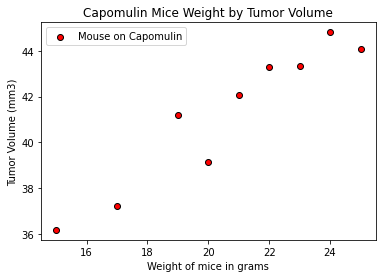

In [17]:
drug_regimen_index = combined_data.set_index("Drug Regimen")
capomulin_mice_weight = drug_regimen_index.loc[['Capomulin']]
cap_mice_weight = capomulin_mice_weight.reset_index()
group_mice_weight = cap_mice_weight.groupby("Weight (g)").mean()
reset_group_weight = group_mice_weight.reset_index()
plt.scatter(reset_group_weight['Weight (g)'], reset_group_weight['Tumor Volume (mm3)'],marker="o", facecolors="red", edgecolors="black", label = "Mouse on Capomulin")
plt.legend(loc="best")
plt.title('Capomulin Mice Weight by Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight of mice in grams')

## Linear Regression

 - Calculating the correlation coefficient and creating a linear regression

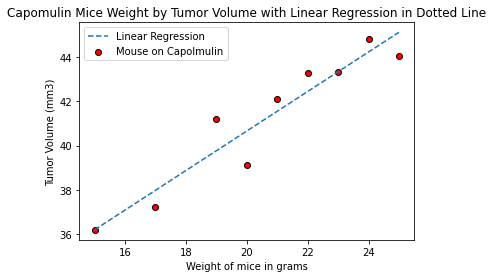

In [18]:
weight = reset_group_weight['Weight (g)']
tumor = reset_group_weight['Tumor Volume (mm3)']

vc_slope, vc_int,_,_,_ = st.linregress(weight,tumor)
vc_fit = vc_slope * weight + vc_int
plt.title('Capomulin Mice Weight by Tumor Volume with Linear Regression in Dotted Line')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight of mice in grams')
plt.scatter(weight,tumor,marker="o", facecolors="red", edgecolors="black", label="Mouse on Capolmulin")
plt.plot(weight,vc_fit,"--", label="Linear Regression")
plt.legend(loc="best")
plt.show()


In [19]:
#Determining Correlation Coefficient between weight and tumor volume.
correlation_coefficient = round(st.pearsonr(weight,tumor)[0],2)

print(f"The correlation coefficient between Weight(g) and Tumor Volume (mm3) is {correlation_coefficient}")


The correlation coefficient between Weight(g) and Tumor Volume (mm3) is nan
